<h1 style="background-color:powderblue;color:black;line-height:100px;text-align:center;">E-commerce Data Analysis</h1>

We have data of an E-commerce company `ABC Corp`. The company wants to focus on targeting the right customers  with the right products to increase overall revenue and conversion rate.

`ABC Corp` has provided you with the clickstream data on their website and wants you to analyse this data to find usefull information that will help them improve their understanding about their customers so that they can create better product personalization, marketing campaigns, advertisements, etc.

The data contains the following fields :-

- `webClientID` - Unique ID of browser for every system. (If a visitor is using multiple browsers on a system like Chrome, Safari, then there would be a different web clientid for each browser). 

- `VisitDateTime` - Date and time of visit.

- `ProductID` - Unique ID of product browsed/ clicked by the visitor.

- `Activity` - Type of activity can be browsing (`pageload`) or clicking (`click`) a product

- `device` - Information about the device used by visitor to visit the website
> - `Browser` - Browser used by visitor
> - `OS` - OS used by the visitor

- `user` - Information about registered user or users who have already signed up
> - `UserID` - Unique ID of the user
> - `City` - City of the user
> - `Country` - Country of the user


----
## Connecting to MongoDB

----

In [27]:
# Importing the required libraries
import pymongo
import pandas as pd
from datetime import datetime
import pprint as pp
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Does not allow pprint to sort the fields
pp.sorted = lambda x, key=None: x

In [23]:
# Connect to local MongoDB server
client = pymongo.MongoClient("mongodb://localhost:27017/")

In [24]:
# Choose the database
db = client['Project_data']

In [25]:
# Sample document
pp.pprint(
    db.clicks.find_one()
)

{'_id': ObjectId('60df1029ad74d9467c91a932'),
 'webClientID': 'WI100000244987',
 'VisitDateTime': datetime.datetime(2018, 5, 25, 4, 51, 14, 179000),
 'ProductID': 'Pr100037',
 'Activity': 'click',
 'device': {'Browser': 'Firefox', 'OS': 'Windows'},
 'user': {'City': 'Colombo', 'Country': 'Sri Lanka'}}


---
## Overiew of the data

----

> Number of documents in the collection

In [30]:
total_docs_count = db.clicks.count_documents({})
print(f"Total documents in the collection: {total_docs_count}")

Total documents in the collection: 6100000


> Minimum date for which the records are present

In [66]:
cur = db.clicks.find({}, {'VisitDateTime': 1, '_id': 0})\
               .sort([('VisitDateTime', pymongo.ASCENDING)])\
               .limit(1)

for doc in cur:
    pp.pprint(doc)
    min_date = doc['VisitDateTime']

{'VisitDateTime': datetime.datetime(2018, 5, 7, 0, 0, 1, 190000)}


> Maximum date  for which the records are present

In [67]:
cur = db.clicks.find({}, {'VisitDateTime': 1, '_id': 0})\
               .sort([('VisitDateTime', pymongo.DESCENDING)])\
               .limit(1)

for doc in cur:
    pp.pprint(doc)
    max_date = doc['VisitDateTime']

{'VisitDateTime': datetime.datetime(2018, 5, 27, 23, 59, 59, 576000)}


> Number of documents that have `user.UserID` field or number of users who have signed up on the website.

In [33]:
signed_up_users = db.clicks.count_documents({'user.UserID': {'$exists': True}})
print(f"Total signed up users: {signed_up_users}")

Total signed up users: 602293


> Unique signed up users in the complete data

In [34]:
unique_signed_up_users = len(db.clicks.find({'user.UserID': {'$exists': True}}).distinct('user.UserID'))
print(f"Total unique signed up users: {unique_signed_up_users}")

Total unique signed up users: 34050


> Unique countries and cities

In [270]:
cur = db.clicks.aggregate([
            {
                '$match': {
                            'user.Country': {'$exists':True},
                            'user.City': {'$exists': True}
                        }
            },
            {
                '$group': {
                                '_id': {
                                            'Country': '$user.Country', 
                                            'City': '$user.City'
                                        }
                        }
            },
            {
                '$sort': {'_id.Country': 1}
            },
            {
                '$limit': 10
            }
        ])

for doc in cur:
    pp.pprint(doc)

{'_id': {'Country': 'Afghanistan', 'City': 'Kabul'}}
{'_id': {'Country': 'Albania', 'City': 'Durrës'}}
{'_id': {'Country': 'Albania', 'City': 'Kosove'}}
{'_id': {'Country': 'Albania', 'City': 'Fier'}}
{'_id': {'Country': 'Albania', 'City': 'Lezhë'}}
{'_id': {'Country': 'Albania', 'City': 'Yzberish'}}
{'_id': {'Country': 'Albania', 'City': 'Korçë'}}
{'_id': {'Country': 'Albania', 'City': 'Shkoder'}}
{'_id': {'Country': 'Albania', 'City': 'Tirana'}}
{'_id': {'Country': 'Albania', 'City': 'Elbasan'}}


> Unique `OS` used by the visitors

In [36]:
db.clicks.find().distinct('device.OS')

['Android', 'BlackBerry OS', 'Chrome OS', 'Chromecast', 'Fedora', 'FreeBSD', 'Kindle', 'Linux', 'Mac OS X', 'NetBSD', 'OpenBSD', 'Other', 'Solaris', 'Tizen', 'Ubuntu', 'Windows', 'Windows Phone', 'iOS']

In [37]:
num_os = len(db.clicks.find().distinct('device.OS'))
print(f"Number of unique OS: {num_os}")

Number of unique OS: 18


> Unique `Browser` used by the visitors

In [39]:
db.clicks.find().distinct('device.Browser')

['AdsBot-Google', 'AhrefsBot', 'Amazon Silk', 'Android', 'AppEngine-Google', 'Apple Mail', 'BingPreview', 'BlackBerry WebKit', 'Chrome', 'Chrome Mobile', 'Chrome Mobile WebView', 'Chrome Mobile iOS', 'Chromium', 'Coc Coc', 'Coveobot', 'Crosswalk', 'Dragon', 'DuckDuckBot', 'Edge', 'Edge Mobile', 'Electron', 'Epiphany', 'Facebook', 'FacebookBot', 'Firefox', 'Firefox Mobile', 'Firefox iOS', 'HbbTV', 'HeadlessChrome', 'HubSpot Crawler', 'IE', 'IE Mobile', 'Iceweasel', 'Iron', 'JobBot', 'Jooblebot', 'K-Meleon', 'Kindle', 'Konqueror', 'Magus Bot', 'Mail.ru Chromium Browser', 'Maxthon', 'Mobile Safari', 'Mobile Safari UI/WKWebView', 'MobileIron', 'NetFront', 'Netscape', 'Opera', 'Opera Coast', 'Opera Mini', 'Opera Mobile', 'Other', 'PagePeeker', 'Pale Moon', 'PetalBot', 'PhantomJS', 'Pinterest', 'Puffin', 'Python Requests', 'QQ Browser', 'QQ Browser Mobile', 'Radius Compliance Bot', 'Safari', 'Samsung Internet', 'SeaMonkey', 'Seekport Crawler', 'SiteScoreBot', 'Sleipnir', 'Sogou Explorer', 'T

In [40]:
num_browsers = len(db.clicks.find().distinct('device.Browser'))
print(f"Number of unique Browsers: {num_browsers}")

Number of unique Browsers: 82


> Unique `Activity` types

In [70]:
activities = db.clicks.find().distinct('Activity')
print(f"Activities: {activities}")

Activities: ['click', 'pageload']


> Number of unique prodcuts

In [42]:
num_prods = len(db.clicks.find().distinct('ProductID'))
print(f"Number of unique Products: {num_prods}")

Number of unique Products: 10938


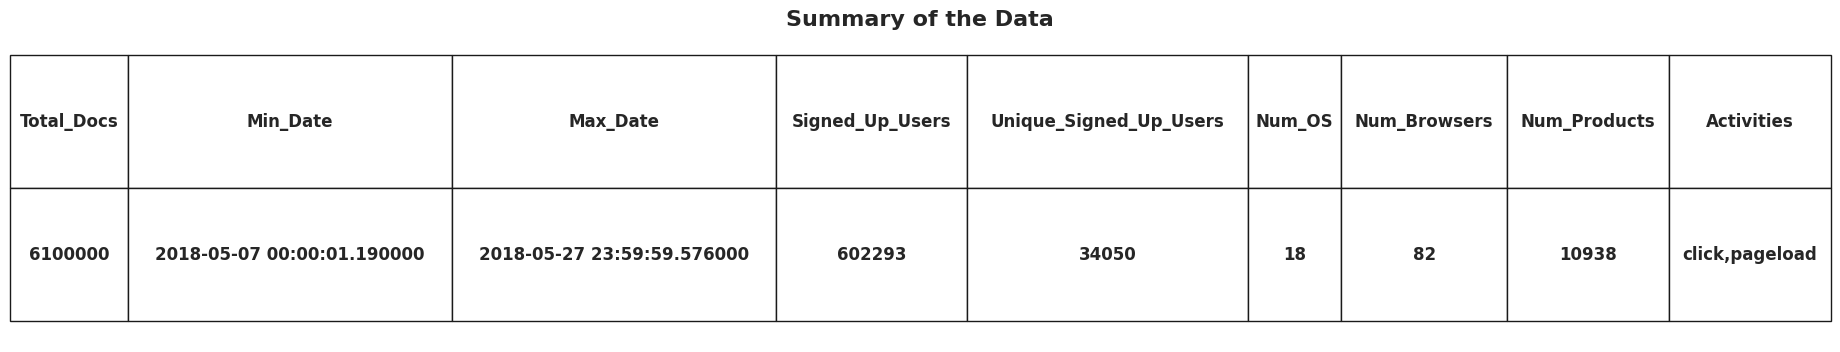

In [124]:
df_obs = pd.DataFrame({"Total_Docs": total_docs_count, 
                       "Min_Date": min_date,
                       "Max_Date": max_date,
                       "Signed_Up_Users": signed_up_users,
                       "Unique_Signed_Up_Users": unique_signed_up_users,
                       "Num_OS": num_os,
                       "Num_Browsers": num_browsers,
                       "Num_Products": num_prods,
                       "Activities": ",".join(activities)}, index=[0])

# Create figure and axes
fig, ax = plt.subplots(figsize=(16, 4))

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create table plot
table = ax.table(cellText=df_obs.values, 
                 colLabels=df_obs.columns, 
                 cellLoc='center', 
                 loc='center')

# Resize the table to fit in the figure
table.scale(1, 8)

table.auto_set_font_size(False)
table.set_fontsize(12)
for (i, j), val in table.get_celld().items():
    val.set_text_props(weight='bold')

table.auto_set_column_width([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.title('Summary of the Data', fontsize=16, weight='bold')
plt.show()

---
# Data Analysis
---

> Get the percentage of documents where there are user ids present. Also get the percentage of documents where the user ids are absent.

In [131]:
cur = db.clicks.aggregate([
                
            # Stage 1 - check if user.UserID is present
            {
                '$match': {'user.UserID': {'$exists': True}}
            },

            # Stage 2- count the filtered documents
            {
                '$count': 'signed_up'
            },

            # Stage 3 - find the percentage
            {
                '$project': {
                    'Percentage_signed_up': {'$multiply':[
                                                            {'$divide': ['$signed_up', total_docs_count]}, 
                                                            100
                                                        ]
                                            },
                    'Percentage_not_signed_up': {'$multiply':[
                                                                {'$divide': [
                                                                                # users who haven't signed up
                                                                                {'$subtract': [total_docs_count, '$signed_up']}, 
                                                                                total_docs_count
                                                                            ]
                                                                },
                                                                100
                                                            ]
                                                }
                }
            }
        ],
        allowDiskUse=True)

for doc in cur:
    pp.pprint(doc)
    signed_up = doc['Percentage_signed_up']
    not_signed_up = doc['Percentage_not_signed_up']

{'Percentage_signed_up': 9.873655737704919,
 'Percentage_not_signed_up': 90.12634426229508}


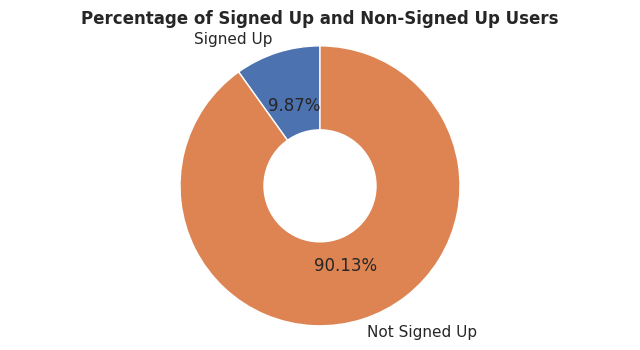

In [145]:
# Plot the chart for the percentage of signed up and not signed up users
fig, ax = plt.subplots(figsize=(8, 4))

# Data to plot
labels = 'Signed Up', 'Not Signed Up'
sizes = [signed_up, not_signed_up]

# Plotting the pie chart
ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)

# Add a circle at the center to transform it to a donut chart
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.title('Percentage of Signed Up and Non-Signed Up Users', weight='bold')
plt.show()

> What was the top 5 most popular products?

In [152]:
cur = db.clicks.aggregate([
    
            # Stage 1 - group on the ProductID field
            {
                # fill in the stage operator to use
                '$group': {
                                '_id': '$ProductID',
                                'Count': {'$sum': 1}
                            }
            },
            # Stage 2 - sort the groups based on the Count
            {
                '$sort': {'Count': -1}
            },
            # Stage 3 - limit the result to return the product with the highest count
            {
                '$limit': 5
            }
        ])

top_products = {}
for doc in cur:
    pp.pprint(doc)
    top_products[doc['_id']] = doc['Count']

{'_id': 'Pr100017', 'Count': 157922}
{'_id': 'Pr101042', 'Count': 117531}
{'_id': 'Pr100102', 'Count': 101505}
{'_id': 'Pr100036', 'Count': 68763}
{'_id': 'Pr100166', 'Count': 65696}


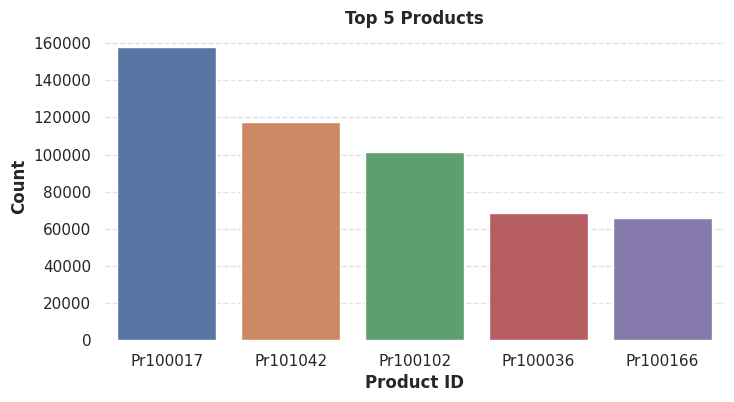

In [158]:
# Plot top 5 products 
fig, ax = plt.subplots(figsize=(8, 4))

products = list(top_products.keys())
counts = list(top_products.values())

sns.barplot(x=products, y=counts, ax=ax)

ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_frame_on(False)

plt.title('Top 5 Products', weight='bold')
plt.xlabel('Product ID', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

> Number of `click` and number of `pageload` for each signed up user. Sort the result in ascending order of the `user.UserID`.

In [271]:
cur = db.clicks.aggregate([
            {
                '$match': {
                    'user.UserID': {'$exists': True}
                }
            },
            {
                '$group': {
                    '_id': {
                        'User': '$user.UserID',
                        'Activity': '$Activity'
                    },
                    'Count': {'$sum': 1}
                }
            },
            {
                '$sort': {'_id.User': 1}
            },
            {
                '$limit': 10
            }
        ])

for doc in cur:
    pp.pprint(doc)

{'_id': {'User': 'U100002', 'Activity': 'pageload'}, 'Count': 3}
{'_id': {'User': 'U100002', 'Activity': 'click'}, 'Count': 2}
{'_id': {'User': 'U100003', 'Activity': 'click'}, 'Count': 2}
{'_id': {'User': 'U100003', 'Activity': 'pageload'}, 'Count': 2}
{'_id': {'User': 'U100004', 'Activity': 'click'}, 'Count': 11}
{'_id': {'User': 'U100004', 'Activity': 'pageload'}, 'Count': 17}
{'_id': {'User': 'U100005', 'Activity': 'pageload'}, 'Count': 6}
{'_id': {'User': 'U100005', 'Activity': 'click'}, 'Count': 4}
{'_id': {'User': 'U100006', 'Activity': 'pageload'}, 'Count': 1}
{'_id': {'User': 'U100007', 'Activity': 'click'}, 'Count': 2}


> The number of records per `Country`. Sort the result in descending order of number of records.

In [176]:
cur = db.clicks.aggregate([
            {
                '$group': {
                    '_id': {
                        'Country': '$user.Country'
                    },
                    'Count': {'$sum': 1}
                }
            },
            {
                '$sort': {'Count': -1}
            }
        ])

records_per_country = {}
for doc in cur:
    pp.pprint(doc)
    records_per_country[doc['_id']['Country']] = doc['Count']

{'_id': {'Country': 'India'}, 'Count': 2663843}
{'_id': {'Country': 'United States'}, 'Count': 833389}
{'_id': {'Country': 'United Kingdom'}, 'Count': 162125}
{'_id': {'Country': None}, 'Count': 129875}
{'_id': {'Country': 'Germany'}, 'Count': 115674}
{'_id': {'Country': 'Singapore'}, 'Count': 107007}
{'_id': {'Country': 'Canada'}, 'Count': 100649}
{'_id': {'Country': 'Australia'}, 'Count': 94601}
{'_id': {'Country': 'France'}, 'Count': 86974}
{'_id': {'Country': 'Turkey'}, 'Count': 86459}
{'_id': {'Country': 'Republic of Korea'}, 'Count': 73706}
{'_id': {'Country': 'Vietnam'}, 'Count': 72577}
{'_id': {'Country': 'Pakistan'}, 'Count': 68222}
{'_id': {'Country': 'Brazil'}, 'Count': 66953}
{'_id': {'Country': 'Malaysia'}, 'Count': 62935}
{'_id': {'Country': 'Netherlands'}, 'Count': 57270}
{'_id': {'Country': 'Italy'}, 'Count': 50987}
{'_id': {'Country': 'Spain'}, 'Count': 49761}
{'_id': {'Country': 'Indonesia'}, 'Count': 46098}
{'_id': {'Country': 'Philippines'}, 'Count': 46006}
{'_id': 

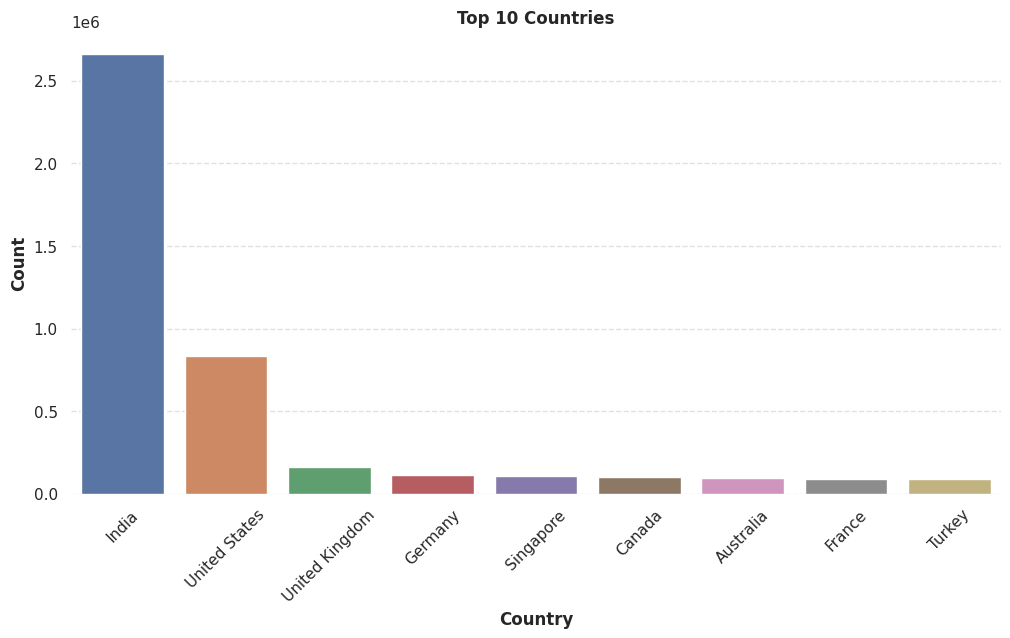

In [179]:
# Plotting records for top 10 countries
fig, ax = plt.subplots(figsize=(12, 6))

countries = list(records_per_country.keys())[:10]
counts = list(records_per_country.values())[:10]

sns.barplot(x=countries, y=counts, ax=ax)

ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_frame_on(False)

plt.title('Top 10 Countries', weight='bold')
plt.xlabel('Country', weight='bold')
plt.ylabel('Count', weight='bold')
plt.xticks(rotation=45)
plt.show()

> What is the most common/frequently used `OS`? And, what is the most common/frequently used `Browser`? Also get the count for both.

In [182]:
cur = db.clicks.aggregate([
    
            # Stage - Sub-pipeline for each result (Facet to split into two sub-pipelines)
            {
                '$facet': {
                    
                                'Most_used_OS': [
                                                    {
                                                        '$group': {
                                                            '_id': '$device.OS',
                                                            'Count': {'$sum': 1}
                                                        }
                                                    },
                                                    {
                                                        '$sort': {'Count': -1}
                                                    },
                                                ],

                                'Most_used_Browser': [
                                                        {
                                                            '$group': {
                                                                '_id': '$device.Browser',
                                                                'Count': {'$sum': 1}
                                                            }
                                                        },
                                                        {
                                                            '$sort': {'Count': -1}
                                                        }
                                                    ]
                            }
            }
        ])

most_used_os = {}
most_used_browser = {}
for doc in cur:
    pp.pprint(doc)
    most_used_os = doc['Most_used_OS']
    most_used_browser = doc['Most_used_Browser']

{'Most_used_OS': [{'_id': 'Windows', 'Count': 3931349},
                  {'_id': 'Android', 'Count': 868168},
                  {'_id': 'Mac OS X', 'Count': 768369},
                  {'_id': 'Linux', 'Count': 308987},
                  {'_id': 'iOS', 'Count': 125337},
                  {'_id': 'Ubuntu', 'Count': 83647},
                  {'_id': 'Chrome OS', 'Count': 9326},
                  {'_id': 'Fedora', 'Count': 3963},
                  {'_id': 'Other', 'Count': 728},
                  {'_id': 'Windows Phone', 'Count': 39},
                  {'_id': 'Tizen', 'Count': 33},
                  {'_id': 'FreeBSD', 'Count': 26},
                  {'_id': 'OpenBSD', 'Count': 6},
                  {'_id': 'NetBSD', 'Count': 6},
                  {'_id': 'Chromecast', 'Count': 6},
                  {'_id': 'Solaris', 'Count': 5},
                  {'_id': 'Kindle', 'Count': 3},
                  {'_id': 'BlackBerry OS', 'Count': 2}],
 'Most_used_Browser': [{'_id': 'Chrome', 'Count': 4360

['Windows', 'Android', 'Mac OS X', 'Linux', 'iOS', 'Ubuntu', 'Chrome OS', 'Fedora', 'Other', 'Windows Phone', 'Tizen', 'FreeBSD', 'OpenBSD', 'NetBSD', 'Chromecast', 'Solaris', 'Kindle', 'BlackBerry OS']

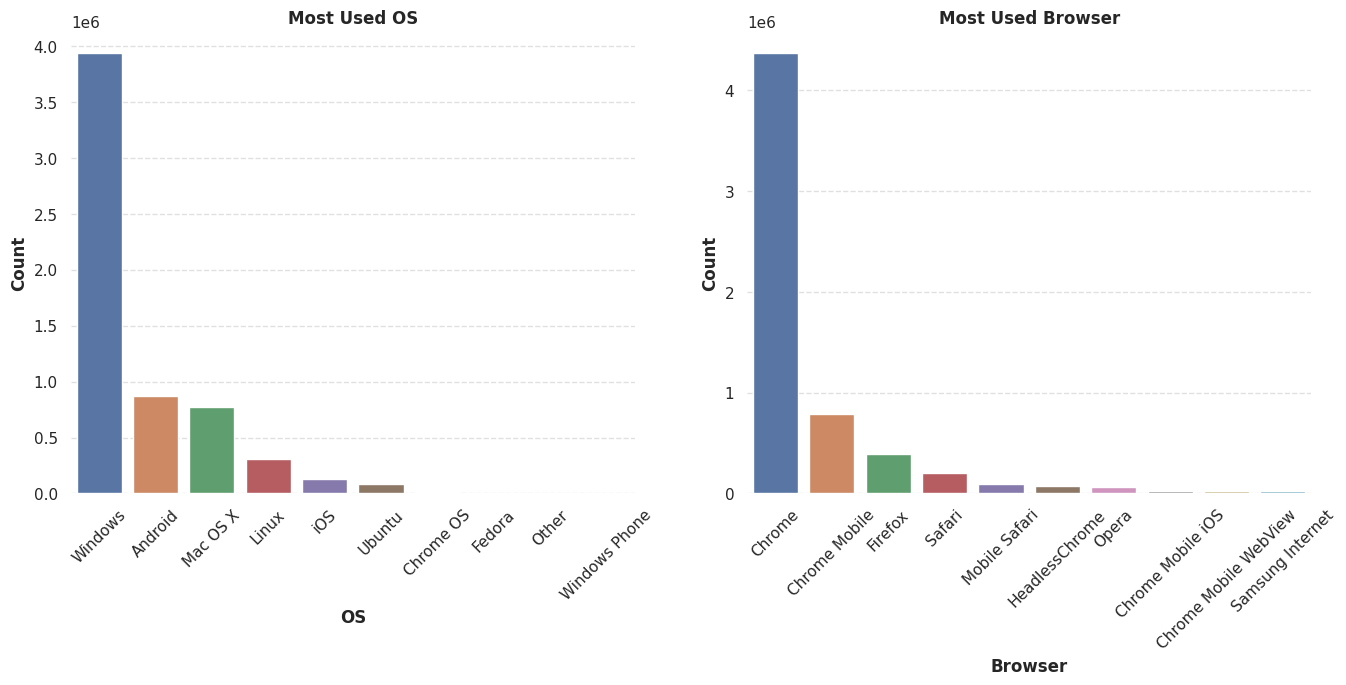

In [188]:
# plot top 10 most used OS and Browser as two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

os = [os['_id'] for os in most_used_os][:10]
counts = [os['Count'] for os in most_used_os][:10]

sns.barplot(x=os, y=counts, ax=ax[0])
ax[0].grid(axis='y', linestyle='--', alpha=0.6)
ax[0].set_frame_on(False)
ax[0].set_title('Most Used OS', weight='bold')
ax[0].set_xlabel('OS', weight='bold')
ax[0].set_ylabel('Count', weight='bold')
ax[0].tick_params(axis='x', rotation=45)

browser = [browser['_id'] for browser in most_used_browser][:10]
counts = [browser['Count'] for browser in most_used_browser][:10]

sns.barplot(x=browser, y=counts, ax=ax[1])
ax[1].grid(axis='y', linestyle='--', alpha=0.6)
ax[1].set_frame_on(False)
ax[1].set_title('Most Used Browser', weight='bold')
ax[1].set_xlabel('Browser', weight='bold')
ax[1].set_ylabel('Count', weight='bold')
ax[1].tick_params(axis='x', rotation=45)

plt.show()

> What is most common `OS` and `Browser` combination used by the users? Also get the count for it.`Example - {'Linux', 'Firefox'}`

In [195]:
cur = db.clicks.aggregate([
            {
                '$project': {
                    'Os-Browser': {
                        '$concat': ['$device.OS', ' - ', '$device.Browser']
                    }
                }
            },
            {
                '$group': {
                    '_id': '$Os-Browser',
                    'Count': {'$sum': 1}
                }
            },
            {
                '$sort': {'Count': -1}
            },
            {
                '$limit': 5
            }
        ])

os_browser = {}
for doc in cur:
    pp.pprint(doc)
    os_browser[doc['_id']] = doc['Count']

{'_id': 'Windows - Chrome', 'Count': 3589891}
{'_id': 'Android - Chrome Mobile', 'Count': 788989}
{'_id': 'Mac OS X - Chrome', 'Count': 522726}
{'_id': 'Windows - Firefox', 'Count': 256273}
{'_id': 'Linux - Chrome', 'Count': 223199}


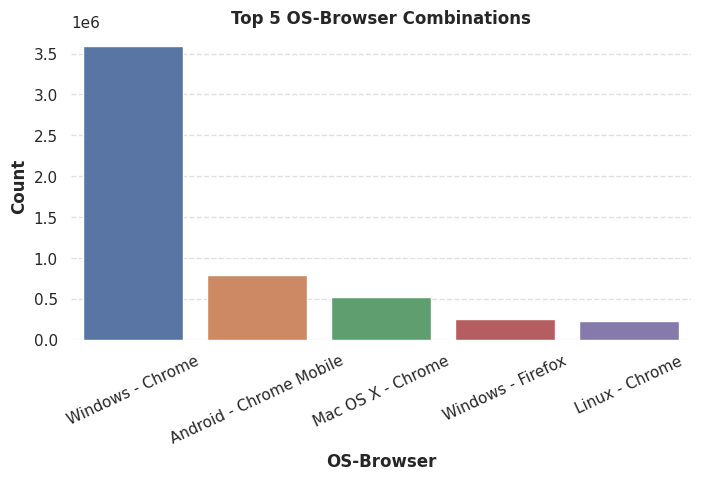

In [206]:
# Plot top 5 OS-Browser combinations
fig, ax = plt.subplots(figsize=(8, 4))

os_browser_com = list(os_browser.keys())
counts = list(os_browser.values())

sns.barplot(x=os_browser_com, y=counts, ax=ax)

ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_frame_on(False)
ax.set_title('Top 5 OS-Browser Combinations', weight='bold')
ax.set_xlabel('OS-Browser', weight='bold')
ax.set_ylabel('Count', weight='bold')
plt.xticks(rotation=25)
plt.show()

> How many unique users were active in each week from  07/05/2018 - 27/05/2018? That is, how may unique users visited in the week from 07/05/2018 - 14/05/2018, from 15/05/2018 - 21/05/2018, and so on.

***Hint - You will need the `$addToSet` operator of `$bucket` stage operator and you will need to use the `$size` aggregation operator.***

In [215]:
cur = db.clicks.aggregate([
    
            # Stage 1 - filter documents for signed up users
            {
                '$match': {
                    'user.UserID': {'$exists': True}
                }
            },
    
            # Stage 2 - bucket by each week from 07/05/2018 - 27/05/2018
            {
                '$bucket': {
                                'groupBy': '$VisitDateTime',
                                # create the bucket for each week 
                                'boundaries': [
                                                    datetime(2018, 5, 7),
                                                    datetime(2018, 5, 14),
                                                    datetime(2018, 5, 21),
                                                    datetime(2018, 5, 28)
                                                ],
                                # get a set of unique users for each week
                                'output': {
                                                'Unique_users': {'$addToSet': '$user.UserID'}
                                        }
                            }
            },
                
            # Stage 3 - project the buckets
            {
                '$project': {
                                '_id': 1,
                                'Unique_users': {
                                                    '$size': '$Unique_users'
                                                }
                            }
            }
        ],
        allowDiskUse=True)

weekly_users = {}
for doc in cur:
    pp.pprint(doc)
    weekly_users[doc['_id']] = doc['Unique_users']

{'_id': datetime.datetime(2018, 5, 7, 0, 0), 'Unique_users': 18308}
{'_id': datetime.datetime(2018, 5, 14, 0, 0), 'Unique_users': 15522}
{'_id': datetime.datetime(2018, 5, 21, 0, 0), 'Unique_users': 16636}


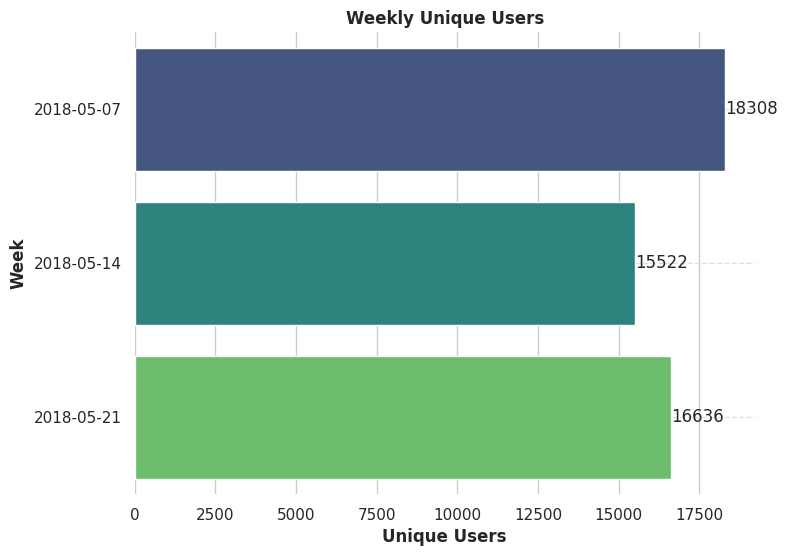

In [230]:
# Plot weekly unique users
fig, ax = plt.subplots(figsize=(8, 6))

weeks = [date.date() for date in weekly_users.keys()]
counts = list(weekly_users.values())

sns.barplot(x=counts, y=weeks, ax=ax, orient='h', palette='viridis')

ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_frame_on(False)
ax.set_title('Weekly Unique Users', weight='bold')
ax.set_xlabel('Unique Users', weight='bold')
ax.set_ylabel('Week', weight='bold')
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge')
plt.show()

> From all the unique users who visited between 07/05/2018 - 15/05/2018 dates, who visited the most number of times? Also get a list of unique products viewed by that user in the same duration.


In [232]:
cur = db.clicks.aggregate([
            
            # Stage 1 - filter the documents between the dates and where the user id exists
            {
                '$match': { 
                            'VisitDateTime': {'$gte': datetime(2018, 5, 7), '$lt': datetime(2018, 5, 15)},
                            'user.UserID': {'$exists': True}
                            }
            },
    
            # Stage 2 - group the documents on the user id,
            #           count how many times that user visited the website,
            #           get an array of unique products viewed by user
            {
                '$group': {
                            '_id': '$user.UserID',
                            'Count': {'$sum': 1},
                            'Products': {'$addToSet': '$ProductID'}
                        }
            },
            
            # Stage 3 - sort the group by the count of visits
            {
                '$sort': {'Count': -1}
            },
            
            # Stage 4 - return the user who visited the most
            {
                '$limit': 1
            }
        ])

most_freq_user = {}
for doc in cur:
    pp.pprint(doc)
    most_freq_user = doc['_id']

{'_id': 'U134751',
 'Count': 1448,
 'Products': ['Pr100040', 'Pr100166', 'Pr100787', 'Pr100123', 'Pr100051']}


> The number of times each unique product was viewed by the user from the previous question in the same time duration.

In [243]:
cur = db.clicks.aggregate([
            {
                '$match': { 
                                # date filter
                                'VisitDateTime': {'$gte': datetime(2018, 5, 7), '$lt': datetime(2018, 5, 15)},
                                'user.UserID': most_freq_user # or {'$eq': most_freq_user}
                            }
            },
            {
                '$group': {
                            '_id': '$ProductID',
                            'Count': {'$sum': 1}
                        }
            }
        ])

products_viewed_by_most_freq_user = {}
for doc in cur:
    pp.pprint(doc)
    products_viewed_by_most_freq_user[doc['_id']] = doc['Count']

{'_id': 'Pr100166', 'Count': 1393}
{'_id': 'Pr100040', 'Count': 6}
{'_id': 'Pr100123', 'Count': 33}
{'_id': 'Pr100051', 'Count': 9}
{'_id': 'Pr100787', 'Count': 7}


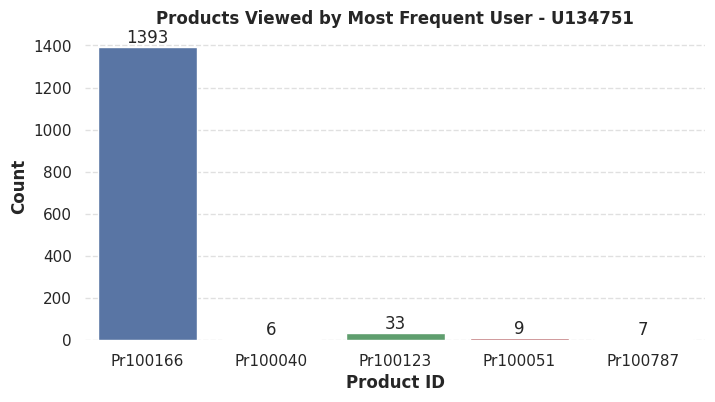

In [246]:
# Plot products viewed by the most frequent user
fig, ax = plt.subplots(figsize=(8, 4))

products = list(products_viewed_by_most_freq_user.keys())
counts = list(products_viewed_by_most_freq_user.values())

sns.barplot(x=products, y=counts, ax=ax)

ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_frame_on(False)
ax.set_title(f'Products Viewed by Most Frequent User - {most_freq_user}', weight='bold')
ax.set_xlabel('Product ID', weight='bold')
ax.set_ylabel('Count', weight='bold')
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge')
plt.show()

> What is the last viewed product by each signed up user till 27/05/2018?

In [247]:
cur = db.clicks.aggregate([
            
            # Stage 1 - filter documents where the user id exists
            {
                '$match': {'user.UserID': {'$exists': True}}
            },
            
            # Stage 2 - sort documents by user id and date of visit
            {
                '$sort': {
                            'user.UserID': 1,
                            'VisitDateTime': 1
                        }
            },
    
            # Stage 3 - group on the user id and find the last product viewed
            {
                '$group': {
                            # fill the following
                            '_id': '$user.UserID',
                            
                            # get the last viewed product
                            'Last_product_viewed': {'$last': '$ProductID'}
                        }
            },
            {
                '$limit': 5
            }
        ],
        allowDiskUse=True)

for doc in cur:
    pp.pprint(doc)

{'_id': 'U104212', 'Last_product_viewed': 'Pr100466'}
{'_id': 'U135682', 'Last_product_viewed': 'Pr100330'}
{'_id': 'U115108', 'Last_product_viewed': 'Pr100188'}
{'_id': 'U108627', 'Last_product_viewed': 'Pr100609'}
{'_id': 'U111395', 'Last_product_viewed': 'Pr100039'}


> Traffic by Day of the week and Hour of the day. That is, how many users visited on Monday, how many on Tuesday, and so on. Also, how many users visited at 1 AM, how many at 2 AM, and so on.

In [250]:
# find count of active user at each day of the week, hour of the day
cur = db.clicks.aggregate([
            {
                '$facet': {
                    'Active_users_day': [
                        {
                            '$group': {
                                '_id': {'$dayOfWeek': '$VisitDateTime'},
                                'Count': {'$sum': 1}
                            }
                        },
                        {
                            '$sort': {'_id': 1}
                        }
                    ],
                    'Active_users_hour': [
                        {
                            '$group': {
                                '_id': {'$hour': '$VisitDateTime'},
                                'Count': {'$sum': 1}
                            }
                        },
                        {
                            '$sort': {'_id': 1}
                        }
                    ]
                }
            }
        ])

active_users = {}
for doc in cur:
    pp.pprint(doc)
    active_users['Day'] = doc['Active_users_day']
    active_users['Hour'] = doc['Active_users_hour']

{'Active_users_day': [{'_id': 1, 'Count': 699362},
                      {'_id': 2, 'Count': 1013122},
                      {'_id': 3, 'Count': 991283},
                      {'_id': 4, 'Count': 951489},
                      {'_id': 5, 'Count': 910500},
                      {'_id': 6, 'Count': 829393},
                      {'_id': 7, 'Count': 704851}],
 'Active_users_hour': [{'_id': 0, 'Count': 104306},
                       {'_id': 1, 'Count': 124203},
                       {'_id': 2, 'Count': 154270},
                       {'_id': 3, 'Count': 192331},
                       {'_id': 4, 'Count': 254287},
                       {'_id': 5, 'Count': 314674},
                       {'_id': 6, 'Count': 342964},
                       {'_id': 7, 'Count': 337577},
                       {'_id': 8, 'Count': 335955},
                       {'_id': 9, 'Count': 337416},
                       {'_id': 10, 'Count': 335560},
                       {'_id': 11, 'Count': 328648},
               

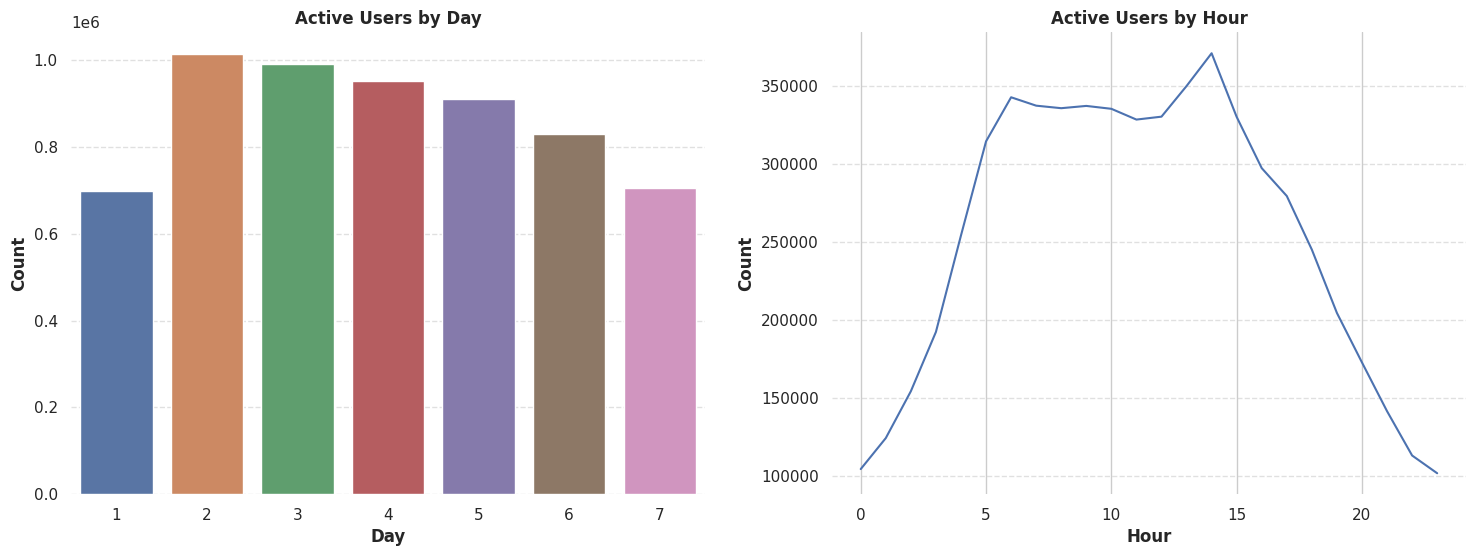

In [263]:
# Plot active users by day and hour
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

days = [day["_id"] for day in active_users['Day']]
counts = [day['Count'] for day in active_users['Day']]

sns.barplot(x=days, y=counts, ax=ax[0])
ax[0].grid(axis='y', linestyle='--', alpha=0.6)
ax[0].set_frame_on(False)
ax[0].set_title('Active Users by Day', weight='bold')
ax[0].set_xlabel('Day', weight='bold')
ax[0].set_ylabel('Count', weight='bold')

hours = [hour['_id'] for hour in active_users['Hour']]
counts = [hour['Count'] for hour in active_users['Hour']]
sns.lineplot(x=hours, y=counts, ax=ax[1])
ax[1].grid(axis='y', linestyle='--', alpha=0.6)
ax[1].set_frame_on(False)
ax[1].set_title('Active Users by Hour', weight='bold')
ax[1].set_xlabel('Hour', weight='bold')
ax[1].set_ylabel('Count', weight='bold')
plt.show()

> Check trend in the number of users visiting the site every day.

In [266]:
cur = db.clicks.aggregate([
    {
        '$group': {
            '_id': {'$dateToString': {'format': '%Y-%m-%d', 'date': '$VisitDateTime'}},
            'Count': {'$sum': 1}
        }
    },
    {
        '$sort':{'_id': 1}
    }
])

per_day_users = {}
for doc in cur:
    pp.pprint(doc)
    per_day_users[doc['_id']] = doc['Count']

{'_id': '2018-05-07', 'Count': 356158}
{'_id': '2018-05-08', 'Count': 329914}
{'_id': '2018-05-09', 'Count': 306481}
{'_id': '2018-05-10', 'Count': 311553}
{'_id': '2018-05-11', 'Count': 272688}
{'_id': '2018-05-12', 'Count': 223787}
{'_id': '2018-05-13', 'Count': 209596}
{'_id': '2018-05-14', 'Count': 307256}
{'_id': '2018-05-15', 'Count': 299773}
{'_id': '2018-05-16', 'Count': 289453}
{'_id': '2018-05-17', 'Count': 262831}
{'_id': '2018-05-18', 'Count': 247415}
{'_id': '2018-05-19', 'Count': 230045}
{'_id': '2018-05-20', 'Count': 242509}
{'_id': '2018-05-21', 'Count': 349708}
{'_id': '2018-05-22', 'Count': 361596}
{'_id': '2018-05-23', 'Count': 355555}
{'_id': '2018-05-24', 'Count': 336116}
{'_id': '2018-05-25', 'Count': 309290}
{'_id': '2018-05-26', 'Count': 251019}
{'_id': '2018-05-27', 'Count': 247257}


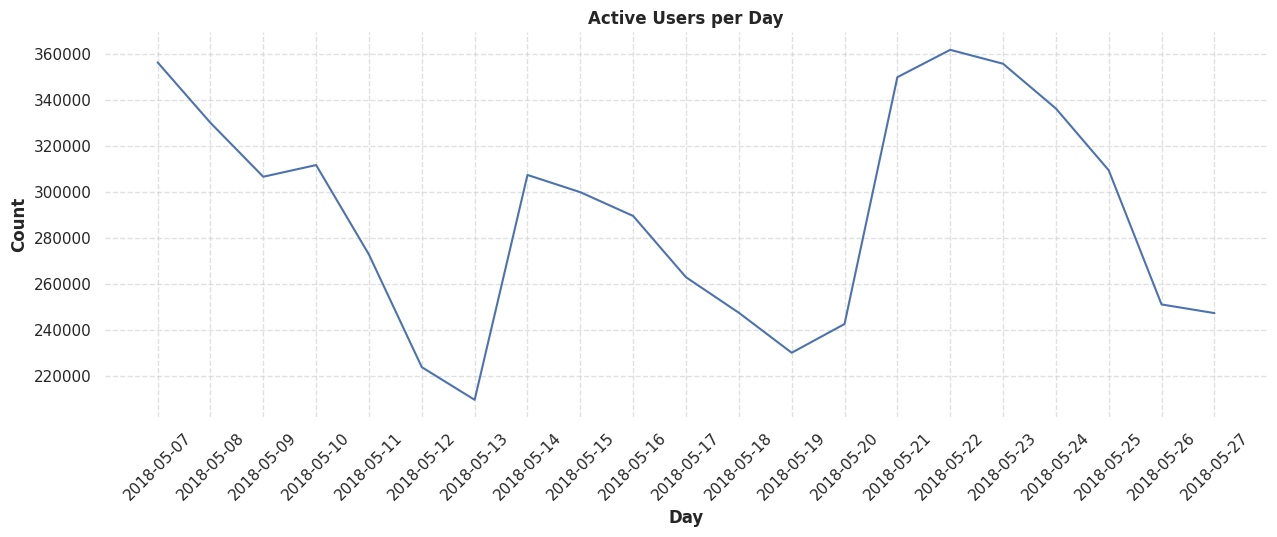

In [269]:
# Plot active users per day
fig, ax = plt.subplots(figsize=(15, 5))

days = list(per_day_users.keys())
counts = list(per_day_users.values())

sns.lineplot(x=days, y=counts, ax=ax)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.grid(axis='x', linestyle='--', alpha=0.6)
ax.set_frame_on(False)
ax.set_title('Active Users per Day', weight='bold')
ax.set_xlabel('Day', weight='bold')
ax.set_ylabel('Count', weight='bold')
plt.xticks(rotation=45)
plt.show()